# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.


## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa do CRISP-DM é o Entendimento dos Dados , que tem como objetivo explorar, compreender e avaliar a qualidade dos dados disponíveis. Essa fase é essencial para garantir que os dados sejam adequados para atender aos objetivos do projeto definidos na etapa anterior.

Vamos detalhar como essa etapa pode ser conduzida no contexto do problema de concessão de cartões de crédito, considerando o dicionário de dados fornecido.


### Dicionário de dados <a name="dicionario"></a>

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variável              | Descrição                                                                                                  | Tipo             |
| --------------------- |:----------------------------------------------------------------------------------------------------------:| ----------------:|
| data_ref              | Data de referência de coleta das variáveis                                                                 | object           |
| id_cliente            | Código identificador exclusivo do cliente                                                                  | int              |
| sexo                  | Sexo do cliente (M = 'Masculino'; F = 'Feminino')                                                          | object (binária) |
| posse_de_veiculo      | Indica se o cliente possui veículo (True = 'Possui veículo'; False = 'Não possui veículo')                 | bool (binária)   |
| posse_de_imovel       | Indica se o cliente possui imóvel (True = 'Possui imóvel'; False = 'Não possui imóvel')                    | bool (binária)   |
| qtd_filhos            | Quantidade de filhos do cliente                                                                            | int              |
| tipo_renda            | Tipo de renda do cliente (Empresário, Assalariado, Servidor público, Pensionista, Bolsista)                | object           |
| educacao              | Grau de instrução do cliente (Primário, Secundário, Superior incompleto, Superior completo, Pós graduação) | object           |
| estado_civil          | Estado civil do cliente (Solteiro, União, Casado, Separado, Viúvo)                                         | object           |
| tipo_residencia       | Tipo de residência do cliente (Casa, Governamental, Com os pais, Aluguel, Estúdio, Comunitário)            | object           |
| idade                 | Idade do cliente em anos                                                                                   | int              |
| tempo_emprego         | Tempo no emprego atual                                                                                     | float            |
| qt_pessoas_residencia | Quantidade de pessoas que moram na residência                                                              | float            |
| **renda**             | Valor numérico decimal representando a renda do cliente em reais                                           | float            |

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [18]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [19]:
renda.drop(labels='Unnamed: 0', axis = 1, inplace=True)

In [20]:
renda.info()
renda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [21]:
renda.nunique()

data_ref                   15
id_cliente               9845
sexo                        2
posse_de_veiculo            2
posse_de_imovel             2
qtd_filhos                  8
tipo_renda                  5
educacao                    5
estado_civil                5
tipo_residencia             6
idade                      47
tempo_emprego            2589
qt_pessoas_residencia       9
renda                    9786
dtype: int64

In [22]:
# Verifica e remove colunas se existirem
colunas_para_remover = ['Unnamed: 0', 'id_cliente']
colunas_existentes = renda.columns
colunas_para_remover = [coluna for coluna in colunas_para_remover if coluna in colunas_existentes]
renda.drop(columns=colunas_para_remover, inplace=True)

print('Quantidade total de linhas:', len(renda), '\n')

print('Quantidade de linhas duplicadas:', renda.duplicated().sum(), '\n')

print('Quantidade após remoção das linhas duplicadas:', len(renda.drop_duplicates()), '\n')

# Remove duplicatas e redefine o índice
renda.drop_duplicates(inplace=True, ignore_index=True)

# Verifica dados faltantes
print('Quantidade de dados faltantes por coluna:')
print(renda.isnull().sum())

# Exibe informações do DataFrame
renda.info()

Quantidade total de linhas: 15000 

Quantidade de linhas duplicadas: 407 

Quantidade após remoção das linhas duplicadas: 14593 

Quantidade de dados faltantes por coluna:
data_ref                    0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2503
qt_pessoas_residencia       0
renda                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14593 entries, 0 to 14592
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               14593 non-null  object 
 1   sexo                   14593 non-null  object 
 2   posse_de_veiculo       14593 non-null  bool   
 3   posse_de_imovel        14593 non-null  bool   
 4  

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

#### Pandas Profiling – Relatório interativo para análise exploratória de dados

In [23]:
# Cria o relatório de perfil
prof = ProfileReport(df=renda, 
                     minimal=False, 
                     explorative=True)

# Cria o diretório de saída se ele não existir
os.makedirs(name='./output', exist_ok=True)

# Salva o relatório em um arquivo HTML
output_path = './output/renda_analysis.html'
prof.to_file(output_path)

# Verifica se o arquivo foi criado com sucesso
if os.path.exists(output_path):
    print(f"Relatório salvo com sucesso em: {output_path}")
else:
    print("Erro ao salvar o relatório.")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 141.25it/s]

Relatório salvo com sucesso em: ./output/renda_analysis.html


####  Estatísticas descritivas das variáveis quantitativas

In [24]:
renda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qtd_filhos,14593.0,0.433290,0.746029,0.000000,0.000000,0.000000,1.000000,14.000000
idade,14593.0,43.868910,11.276626,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,12090.0,7.724567,6.718007,0.117808,3.006164,6.013699,10.123288,42.906849
qt_pessoas_residencia,14593.0,2.207086,0.909117,1.000000,2.000000,2.000000,3.000000,15.000000
renda,14593.0,5698.140557,8314.021152,118.710000,2018.880000,3488.410000,6379.570000,245141.670000


### Entendimento dos dados - Bivariadas

#### Matriz de correlação

In [25]:
renda_numerico = renda.iloc[:, 3:].select_dtypes(include=np.number)

# Calcula a correlação
correlacao = renda_numerico.corr()

# Seleciona a última linha
ultima_linha_correlacao = correlacao.tail(n=1)

print(ultima_linha_correlacao)

       qtd_filhos     idade  tempo_emprego  qt_pessoas_residencia  renda
renda    0.030296  0.023445       0.385014               0.048616    1.0


A partir da matriz de correlação, é possível observar que a variável que apresenta maior relação com a varíavel `renda` é `tempo_emprego`, com um índice de correlação de 38,5%.

#### Matriz de dispersão

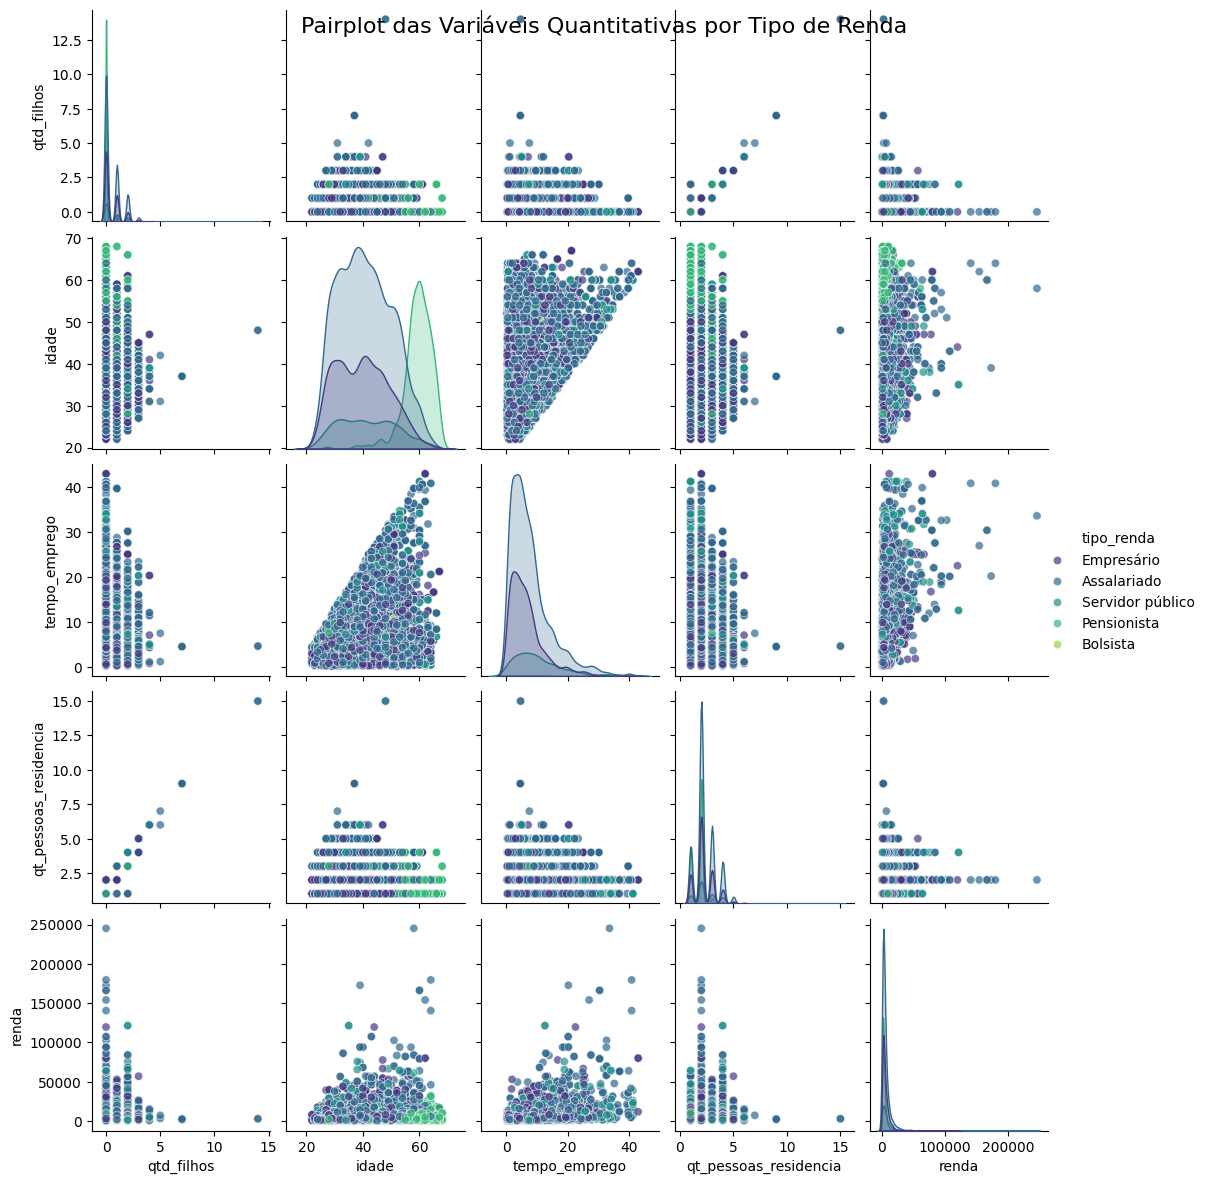

In [26]:
# Personalização do pairplot
sns.pairplot(data=renda, 
             hue='tipo_renda', 
             vars=['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda'], 
             diag_kind='kde', # ou 'hist'
             palette='viridis', # Escolha uma paleta de cores
             plot_kws={'alpha': 0.7}) # Ajuste a transparência dos pontos

# Adicionando título ao gráfico
plt.suptitle('Pairplot das Variáveis Quantitativas por Tipo de Renda', fontsize=16)

# Ajustando o tamanho da figura (opcional)
plt.gcf().set_size_inches(12, 12)

# Exibindo o gráfico
#plt.show() # Não necessário em Jupyter Notebook

A análise do pairplot, que exibe a matriz de dispersão entre todas as variáveis quantitativas, revela a presença de outliers na variável renda. Esses outliers, embora raros, podem distorcer a análise de tendência, exigindo consideração cuidadosa em modelagens futuras. Além disso, a baixa densidade de pontos fora da diagonal principal do pairplot sugere uma fraca correlação linear entre as variáveis quantitativas. Essa observação corrobora os resultados da matriz de correlação, que também indicou baixos coeficientes de correlação entre as mesmas variáveis.

Clustermap

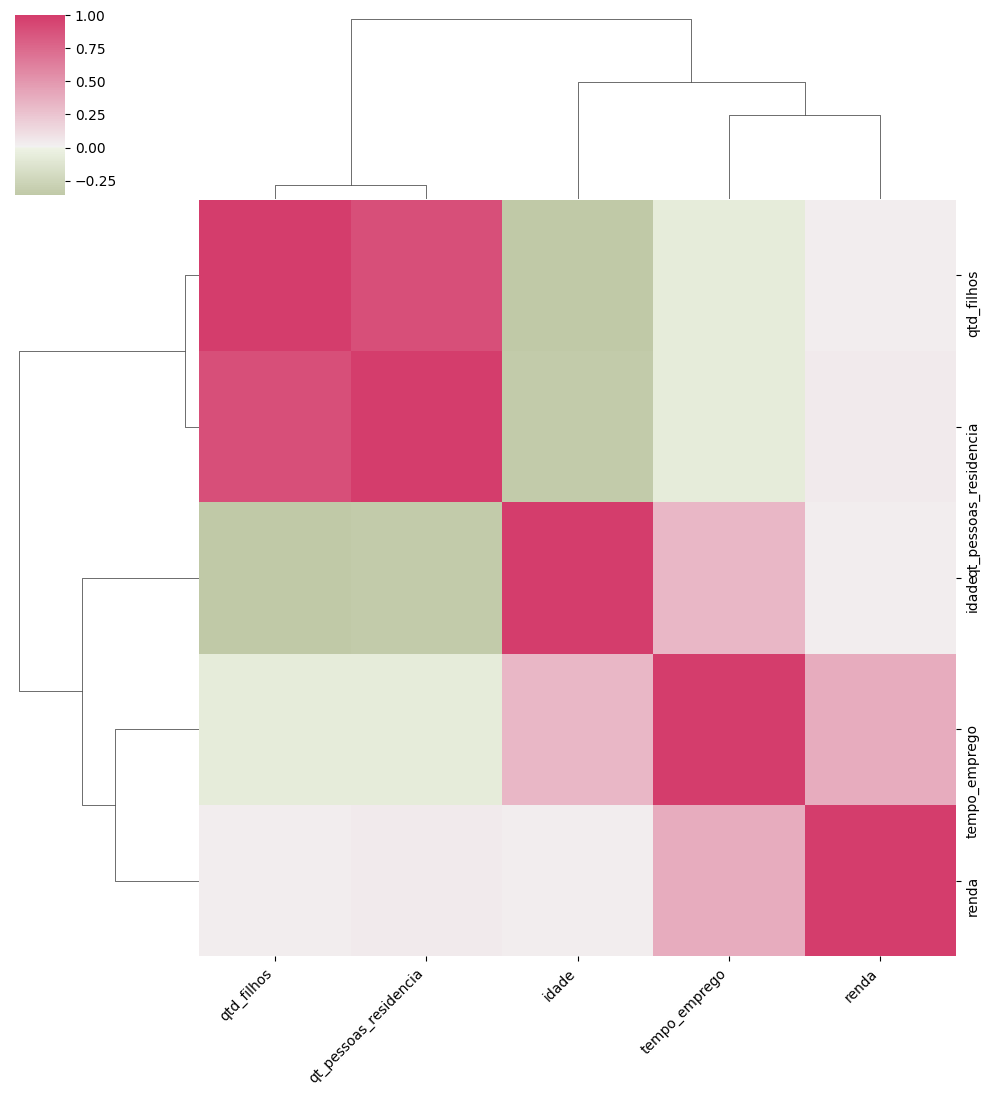

In [27]:
#Identificando as colunas não numéricas
colunas_nao_numericas = renda.select_dtypes(exclude=np.number).columns

#Criando um novo dataframe apenas com colunas numéricas.
renda_numerico = renda.drop(columns=colunas_nao_numericas)

#Calculando a correlação
correlacao = renda_numerico.corr()

#Criando o cmap
cmap = sns.diverging_palette(h_neg=100,
                                h_pos=359,
                                as_cmap=True,
                                sep=1,
                                center='light')

#Criando o clustermap
ax = sns.clustermap(data=correlacao,
                    figsize=(10, 10),
                    center=0,
                    cmap=cmap)

#Rotacionando os labels
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=45, ha='right')

#Exibindo o gráfico
plt.show()

O clustermap reforça a observação de baixa correlação entre a maioria das variáveis e a `renda`. Destaca-se a variável `tempo_emprego`, que apresenta uma correlação positiva moderada com a renda, sugerindo que indivíduos com mais tempo de emprego tendem a ter rendas mais altas. As variáveis booleanas `posse_de_imovel` e `posse_de_veiculo` mostram correlações fracas com a renda, indicando que a posse desses bens tem pouca influência na renda dos indivíduos na amostra.

Linha de tendência

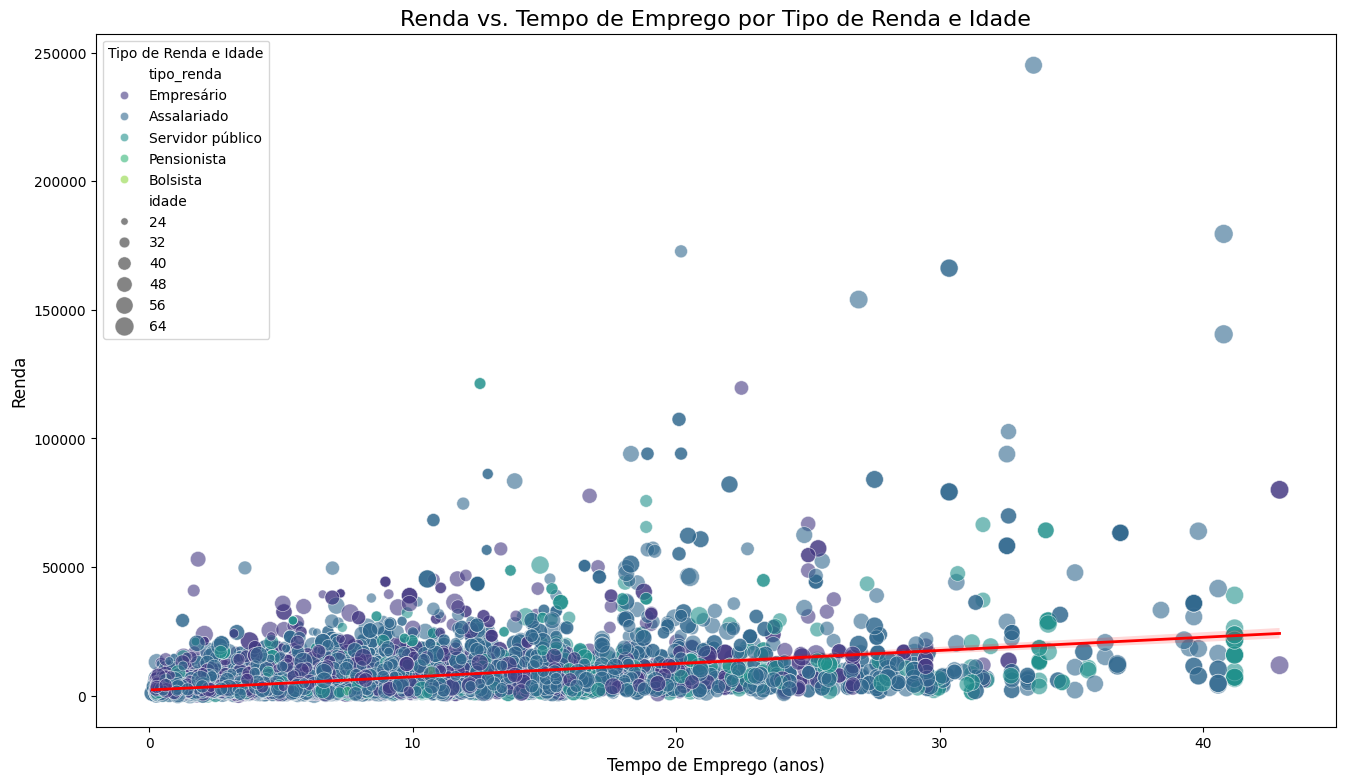

In [28]:
# Configuração do tamanho da figura
plt.figure(figsize=(16, 9))

# Scatterplot com cores diferenciadas por tipo de renda e tamanho por idade
sns.scatterplot(x='tempo_emprego',
                y='renda',
                hue='tipo_renda',
                size='idade',
                data=renda,
                alpha=0.6, # Aumentando a transparência para melhor visualização
                sizes=(20, 200), # Ajustando a escala do tamanho dos pontos
                palette='viridis') # Escolhendo uma paleta de cores adequada

# Linha de tendência
sns.regplot(x='tempo_emprego',
            y='renda',
            data=renda,
            scatter=False,
            color='red', # Mudando a cor da linha de tendência
            line_kws={'linewidth': 2}) # Ajustando a espessura da linha de tendência

# Adicionando título e rótulos dos eixos
plt.title('Renda vs. Tempo de Emprego por Tipo de Renda e Idade', fontsize=16)
plt.xlabel('Tempo de Emprego (anos)', fontsize=12)
plt.ylabel('Renda', fontsize=12)

# Melhorando a legenda
plt.legend(title='Tipo de Renda e Idade')

# Exibindo o gráfico
#plt.show() # Não necessário em Jupyter Notebook

## Renda vs. Tempo de Emprego por Tipo de Renda e Idade

Este gráfico explora a relação entre renda e tempo de emprego, diferenciando por tipo de renda e idade.

**Observações Principais:**

* **Tendência Positiva:** A renda tende a aumentar com o tempo de emprego, conforme indicado pela linha de tendência.
* **Dispersão:** A alta dispersão dos pontos sugere que outros fatores, além do tempo de emprego, influenciam a renda.
* **Diferenciação:** A diferenciação por tipo de renda e idade revela padrões distintos na relação entre essas variáveis e a renda.
* **Outliers:** Pontos com renda excepcionalmente alta destacam casos de sucesso notáveis.

**Pontos-chave:**

* A linha de tendência mostra uma correlação positiva entre tempo de emprego e renda.
* A distribuição dos pontos indica que a renda é influenciada por múltiplos fatores.
* A legenda detalha os tipos de renda e as faixas de idade representadas no gráfico.
* Outliers sugerem a presença de indivíduos com rendas significativamente acima da média.

### Análise das variáveis qualitativas

##### Análise de relevância preditiva com variáveis booleanas

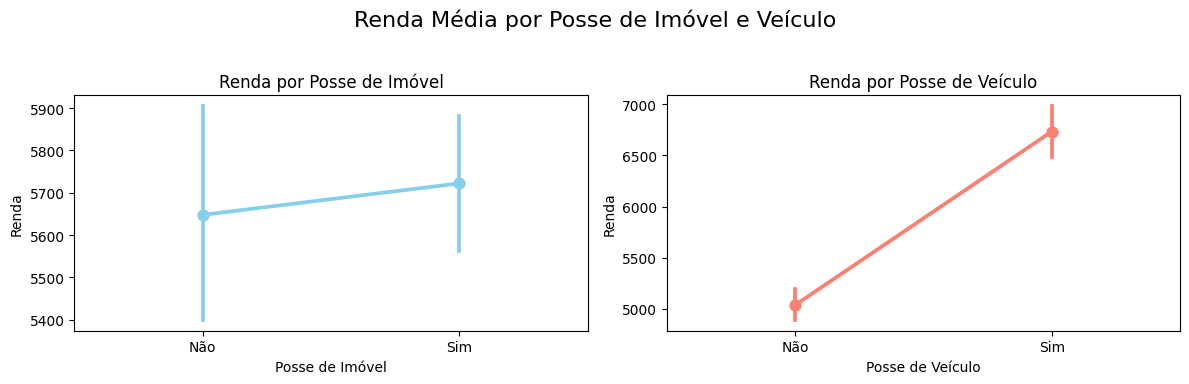

In [29]:
# Configuração do tamanho da figura
plt.rc('figure', figsize=(12, 4))

# Criação dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

# Pointplot para posse de imóvel
sns.pointplot(x='posse_de_imovel',
              y='renda',
              data=renda,
              dodge=True,
              ax=axes[0],
              color='skyblue',  # Escolhendo uma cor
              markers='o',  # Escolhendo o marcador
              linestyles='-',  # Escolhendo o estilo da linha
              errorbar=('ci', 95))  # Atualizando o parâmetro ci
axes[0].set_title('Renda por Posse de Imóvel')  # Adicionando título ao subplot
axes[0].set_xlabel('Posse de Imóvel')  # Adicionando label ao eixo x
axes[0].set_ylabel('Renda')  # Adicionando label ao eixo y
axes[0].set_xticks([0, 1])  # Definindo os ticks
axes[0].set_xticklabels(['Não', 'Sim'])  # Alterando os labels do eixo x

# Pointplot para posse de veículo
sns.pointplot(x='posse_de_veiculo',
              y='renda',
              data=renda,
              dodge=True,
              ax=axes[1],
              color='salmon',  # Escolhendo uma cor
              markers='o',  # Escolhendo o marcador
              linestyles='-',  # Escolhendo o estilo da linha
              errorbar=('ci', 95))  # Atualizando o parâmetro ci
axes[1].set_title('Renda por Posse de Veículo')  # Adicionando título ao subplot
axes[1].set_xlabel('Posse de Veículo')  # Adicionando label ao eixo x
axes[1].set_ylabel('Renda')  # Adicionando label ao eixo y
axes[1].set_xticks([0, 1])  # Definindo os ticks
axes[1].set_xticklabels(['Não', 'Sim'])  # Alterando os labels do eixo x

# Adicionando um título geral ao gráfico
fig.suptitle('Renda Média por Posse de Imóvel e Veículo', fontsize=16)

# Ajustando o layout para evitar sobreposição de elementos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Exibindo o gráfico
plt.show()  # Não necessário em Jupyter Notebook

## Renda Média por Posse de Imóvel e Veículo

Este gráfico compara a renda média de indivíduos com e sem posse de imóveis e veículos.

**Observações Principais:**

* **Correlação Positiva:** A posse de imóveis e veículos está correlacionada com uma renda média mais alta.
* **Impacto da Posse de Veículo:** A posse de veículo demonstra um impacto maior na renda média em comparação com a posse de imóvel.
* **Renda Média:** O gráfico mostra a renda média para cada grupo, permitindo a comparação direta entre eles.
* **Barras de Erro:** As barras de erro indicam a variabilidade dos dados em cada categoria, fornecendo uma medida da incerteza.

**Subgráficos:**

* **Renda por Posse de Imóvel:**
    * A renda média é ligeiramente maior para quem possui imóvel ("Sim") do que para quem não possui ("Não").
    * As barras de erro verticais mostram a variação dos dados.
* **Renda por Posse de Veículo:**
    * A renda média é visivelmente maior para quem possui veículo ("Sim") do que para quem não possui ("Não").
    * As barras de erro verticais mostram a variação dos dados.

**Conclusão:**

Em média, pessoas que possuem imóveis e, principalmente, veículos tendem a ter uma renda mais alta. A posse de veículo parece ter um impacto maior na renda do que a posse de imóvel.

#### Análise das variáveis qualitativas ao longo do tempo 

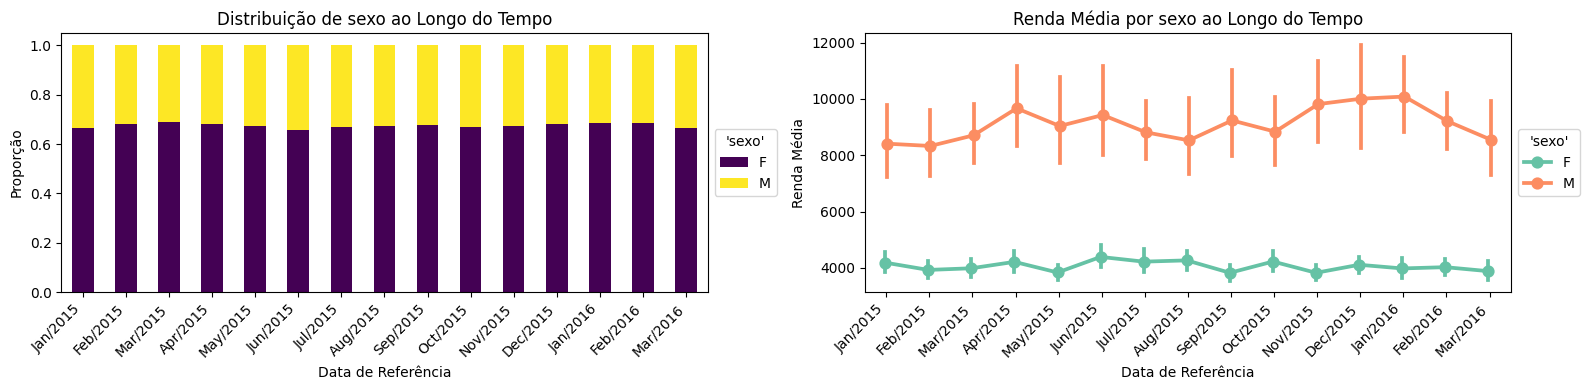

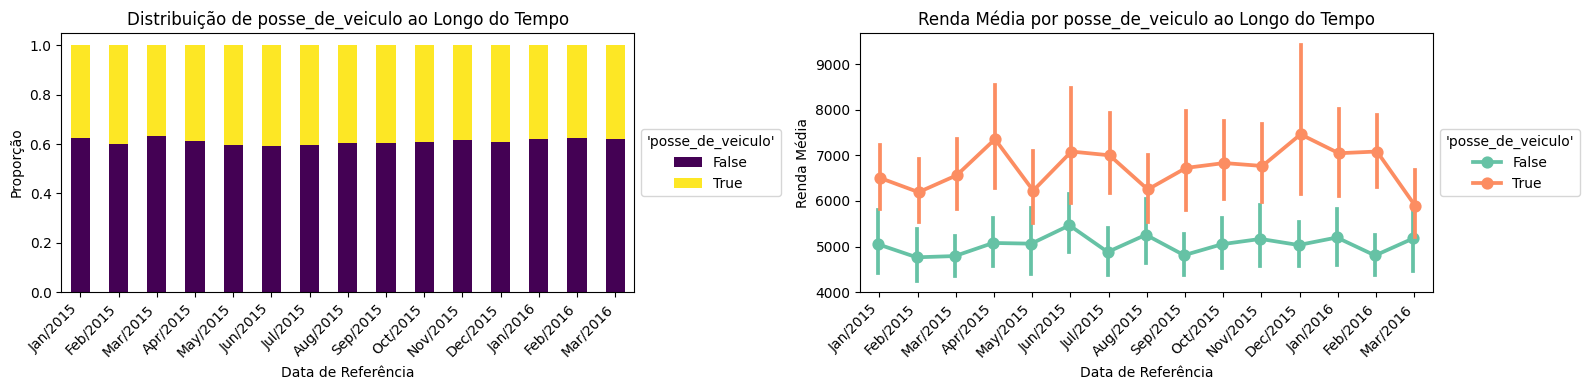

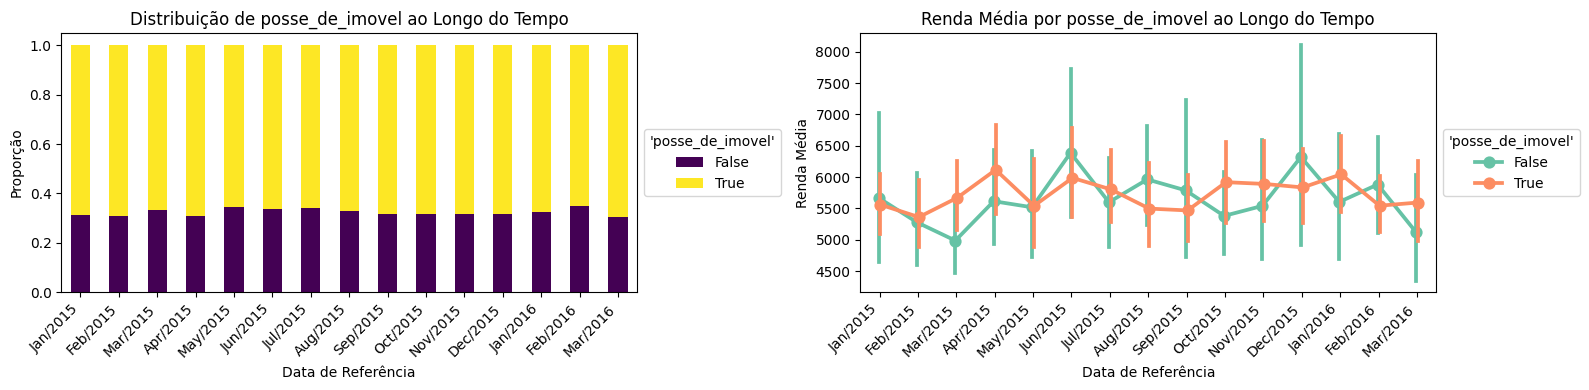

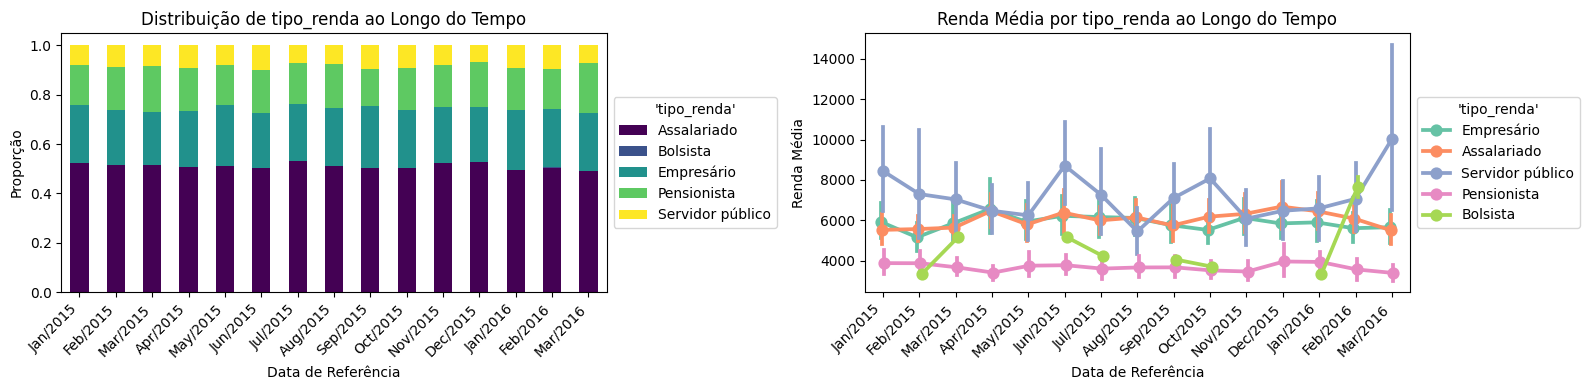

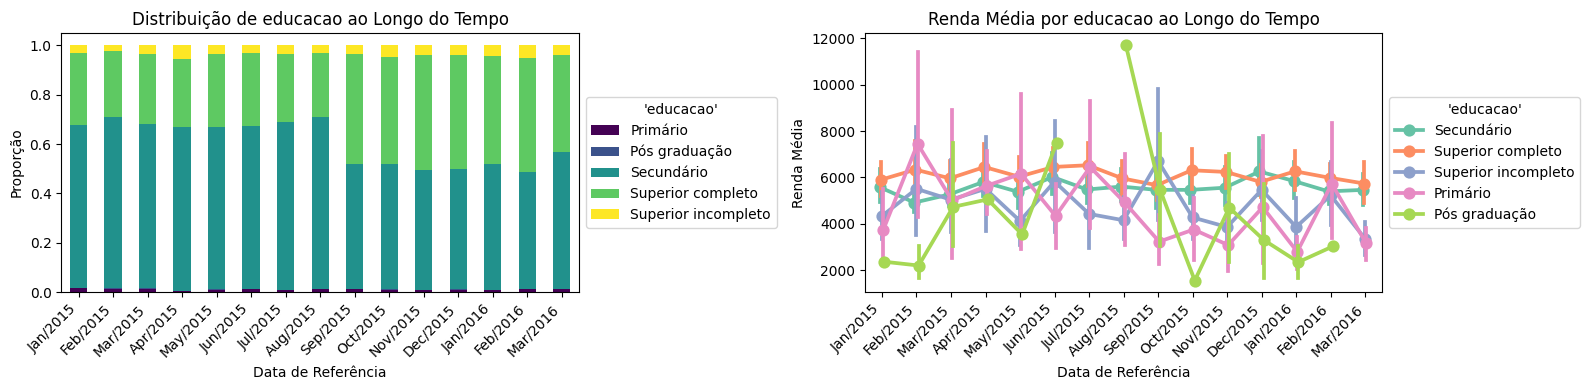

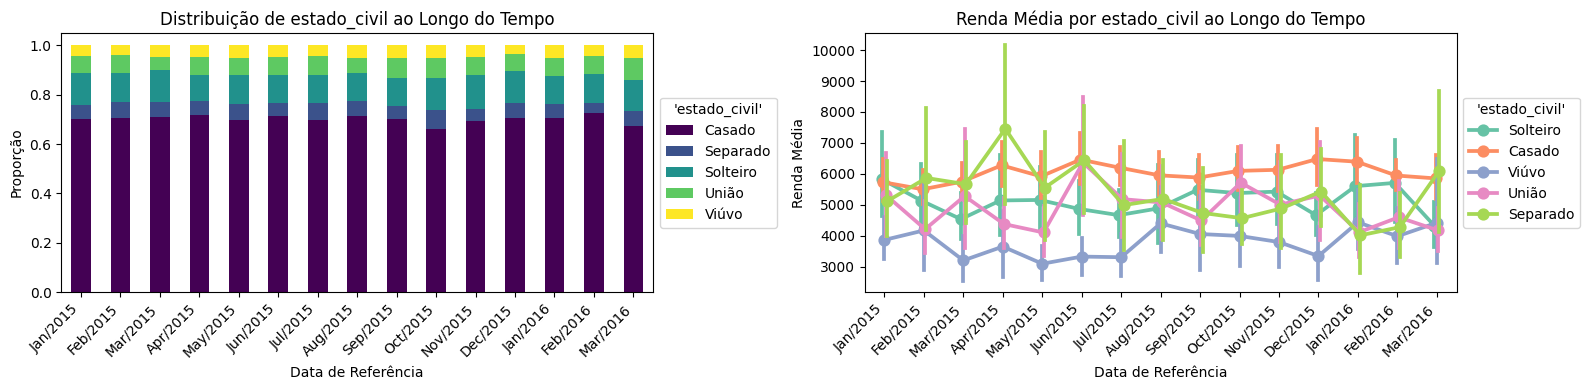

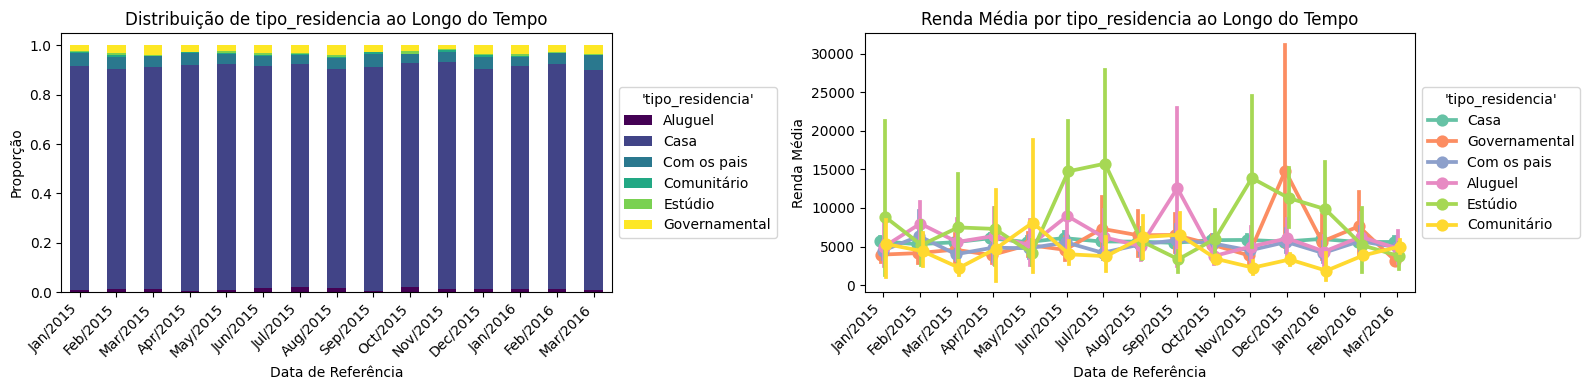

In [30]:
def plot_qualitative_variables(renda, col):
    """
    Plota gráficos de barras empilhadas e perfis médios no tempo para uma variável qualitativa.

    Args:
        renda (pd.DataFrame): DataFrame contendo os dados.
        col (str): Nome da coluna qualitativa.
    """

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
    fig.subplots_adjust(wspace=0.6)

    # Formatação das datas para exibição
    tick_labels = renda['data_ref'].dt.strftime('%b/%Y').unique()

    # Barras empilhadas
    renda_crosstab = pd.crosstab(
        index=renda['data_ref'], columns=renda[col], normalize='index'
    )
    ax0 = renda_crosstab.plot.bar(stacked=True, ax=axes[0], colormap='viridis') #colormap adicionado
    ax0.set_xticks(range(len(tick_labels)))  # Defina os ticks aqui
    ax0.set_xticklabels(labels=tick_labels, rotation=45, ha='right') #ha='right' adicionado para melhor visualização
    axes[0].legend(bbox_to_anchor=(1, 0.5), loc='center left', title=f"'{col}'")
    axes[0].set_title(f'Distribuição de {col} ao Longo do Tempo')
    axes[0].set_xlabel('Data de Referência')
    axes[0].set_ylabel('Proporção')

    # Perfis médios no tempo
    ax1 = sns.pointplot(
        x='data_ref', y='renda', hue=col, data=renda, dodge=True, errorbar=('ci', 95), ax=axes[1], palette='Set2' #palette adicionado
    )
    ax1.set_xticks(range(len(tick_labels)))  # Defina os ticks aqui
    ax1.set_xticklabels(labels=tick_labels, rotation=45, ha='right') #ha='right' adicionado para melhor visualização
    axes[1].legend(bbox_to_anchor=(1, 0.5), loc='center left', title=f"'{col}'")
    axes[1].set_title(f'Renda Média por {col} ao Longo do Tempo')
    axes[1].set_xlabel('Data de Referência')
    axes[1].set_ylabel('Renda Média')

    plt.tight_layout() #melhora o layout para evitar sobreposição
    #plt.show() # Não necessário em Jupyter Notebook

# Conversão da coluna 'data_ref' para datetime
renda['data_ref'] = pd.to_datetime(renda['data_ref'])

# Seleção das colunas qualitativas
qualitativas = renda.select_dtypes(include=['object', 'boolean']).columns

# Plotagem dos gráficos para cada variável qualitativa
for col in qualitativas:
    plot_qualitative_variables(renda, col)

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [31]:
renda.drop(columns='data_ref', inplace=True)
renda.dropna(inplace=True)

pd.DataFrame(index=renda.nunique().index, 
             data={'tipos_dados': renda.dtypes, 
                   'qtd_valores': renda.notna().sum(), 
                   'qtd_categorias': renda.nunique().values})

,tipos_dados,qtd_valores,qtd_categorias
sexo,object,12090,2
posse_de_veiculo,bool,12090,2
posse_de_imovel,bool,12090,2
qtd_filhos,int64,12090,8
tipo_renda,object,12090,5
educacao,object,12090,5
estado_civil,object,12090,5
tipo_residencia,object,12090,6
idade,int64,12090,46
tempo_emprego,float64,12090,2589


### Conversão das variáveis categóricas em variáveis numéricas (dummies)

In [32]:
renda_dummies = pd.get_dummies(data=renda)
renda_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12090 entries, 0 to 14592
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12090 non-null  bool   
 1   posse_de_imovel                12090 non-null  bool   
 2   qtd_filhos                     12090 non-null  int64  
 3   idade                          12090 non-null  int64  
 4   tempo_emprego                  12090 non-null  float64
 5   qt_pessoas_residencia          12090 non-null  float64
 6   renda                          12090 non-null  float64
 7   sexo_F                         12090 non-null  bool   
 8   sexo_M                         12090 non-null  bool   
 9   tipo_renda_Assalariado         12090 non-null  bool   
 10  tipo_renda_Bolsista            12090 non-null  bool   
 11  tipo_renda_Empresário          12090 non-null  bool   
 12  tipo_renda_Pensionista         12090 non-null  bool

In [33]:
# Calcula a correlação das variáveis com a coluna 'renda'
correlacoes = renda_dummies.corr()['renda'].sort_values(ascending=False)

# Converte a série de correlações em um DataFrame
correlacoes_df = correlacoes.to_frame().reset_index()

# Renomeia as colunas para 'var' e 'corr'
correlacoes_df = correlacoes_df.rename(columns={'index': 'var', 'renda': 'corr'})

# Aplica o estilo de barra ao DataFrame
correlacoes_estilizadas = correlacoes_df.style.bar(color=['darkred', 'darkgreen'], align=0)

# Exibe o DataFrame estilizado
correlacoes_estilizadas

,var,corr
0,renda,1.000000
1,tempo_emprego,0.385014
2,sexo_M,0.265174
3,idade,0.127516
4,posse_de_veiculo,0.082040
5,estado_civil_Casado,0.054290
6,tipo_renda_Servidor público,0.042177
7,tipo_residencia_Estúdio,0.026417
8,qt_pessoas_residencia,0.019571
9,educacao_Superior completo,0.017425


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Optei por utilizar o DecisionTreeRegressor devido à sua eficácia em resolver problemas de regressão, como a previsão de renda dos clientes. Esta técnica é particularmente vantajosa porque as árvores de decisão são intuitivas e fáceis de interpretar. Elas permitem visualizar claramente o processo de tomada de decisão e identificar os atributos mais influentes na previsão da variável-alvo. Além disso, a capacidade das árvores de decisão de lidar com dados não lineares e interações complexas entre variáveis as torna uma escolha robusta e confiável para este projeto.


### Divisão da base em treino e teste

In [34]:
# Separação das variáveis independentes (X) e dependente (y)
X = renda_dummies.drop(columns='renda')
y = renda_dummies['renda']

# Exibição das dimensões de X e y
print(f'Quantidade de linhas e colunas de X: {X.shape}')
print(f'Quantidade de linhas de y: {len(y)}')

# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Exibição das dimensões dos conjuntos de treino e teste
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

Quantidade de linhas e colunas de X: (12090, 29)
Quantidade de linhas de y: 12090
X_train: (9067, 29)
X_test: (3023, 29)
y_train: (9067,)
y_test: (3023,)


### Seleção de hiperparâmetros do modelo com for loop

In [35]:
score = pd.DataFrame(columns=['max_depth', 'min_samples_leaf', 'score'])

for x in range(1, 21):
    for y in range(1, 31):
        reg_tree = DecisionTreeRegressor(random_state=42, 
                                         max_depth=x, 
                                         min_samples_leaf=y)
        reg_tree.fit(X_train, y_train)
        
        score = pd.concat(objs=[score, 
                                pd.DataFrame({'max_depth': [x], 
                                              'min_samples_leaf': [y], 
                                              'score': [reg_tree.score(X=X_test, 
                                                                       y=y_test)]})], 
                          axis=0, 
                          ignore_index=True)
        
score.sort_values(by='score', ascending=False)

C:\Users\Paulo Roberto\AppData\Local\Temp\ipykernel_14940\2645755207.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  score = pd.concat(objs=[score,


,max_depth,min_samples_leaf,score
213,8,4,0.417122
543,19,4,0.401091
243,9,4,0.401005
393,14,4,0.400246
245,9,6,0.399395
...,...,...,...
29,1,30,0.056241
3,1,4,0.056241
2,1,3,0.056241
1,1,2,0.056241


### Rodando o modelo


In [36]:
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)

#### Visualização gráfica da árvore com plot_tree

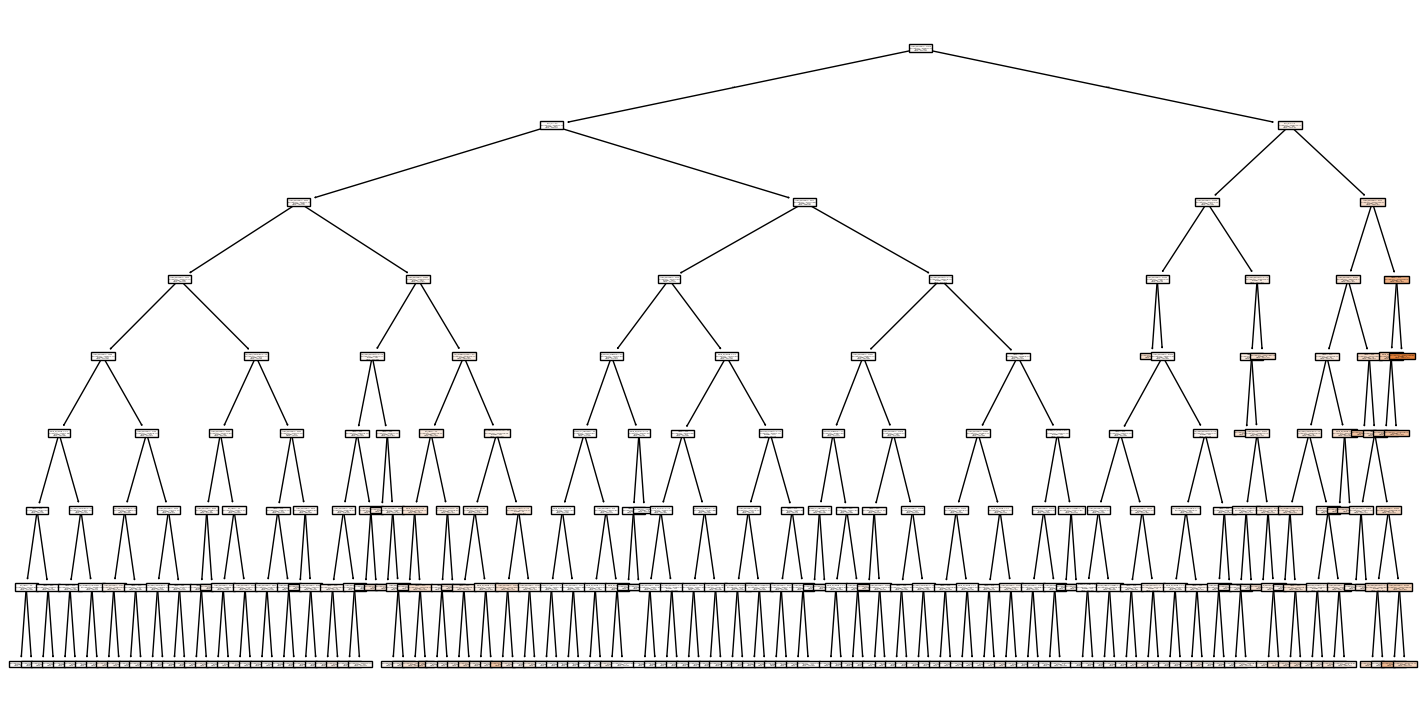

In [37]:
# Configuração do tamanho da figura
plt.rc('figure', figsize=(18, 9))

# Plotagem da árvore de decisão
tp = tree.plot_tree(decision_tree=reg_tree, 
                    feature_names=X.columns, 
                    filled=True)

# Exibição do gráfico
plt.show()

#### Visualização impressa da árvore

In [38]:
# Exportação da árvore de decisão em formato de texto
text_tree_print = tree.export_text(decision_tree=reg_tree)

# Impressão da árvore de decisão
print(text_tree_print)

|--- feature_4 <= 17.08
|   |--- feature_6 <= 0.50
|   |   |--- feature_4 <= 6.93
|   |   |   |--- feature_4 <= 4.54
|   |   |   |   |--- feature_4 <= 1.69
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_3 <= 52.50
|   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |--- value: [3237.54]
|   |   |   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |   |   |--- value: [1415.27]
|   |   |   |   |   |   |--- feature_3 >  52.50
|   |   |   |   |   |   |   |--- feature_3 <= 56.00
|   |   |   |   |   |   |   |   |--- value: [6817.46]
|   |   |   |   |   |   |   |--- feature_3 >  56.00
|   |   |   |   |   |   |   |   |--- value: [4458.54]
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |--- feature_3 <= 54.50
|   |   |   |   |   |   |   |   |--- value: [4821.44]
|   |   |   |   |   |   |   |--- feature_3 >  54.50
|   |   |   |   |   |   |   |   |--

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [39]:
# Cálculo do coeficiente de determinação (R²) para os conjuntos de treino e teste
r2_train = reg_tree.score(X_train, y_train)
r2_test = reg_tree.score(X_test, y_test)

# Template para exibição dos resultados
template = 'O coeficiente de determinação (R²) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

# Impressão dos resultados com substituição de ponto por vírgula
print(template.format(reg_tree.get_depth(), 'treino', r2_train).replace(".", ","))
print(template.format(reg_tree.get_depth(), 'teste', r2_test).replace(".", ","), '\n')

O coeficiente de determinação (R²) da árvore com profundidade = 8 para a base de treino é: 0,60
O coeficiente de determinação (R²) da árvore com profundidade = 8 para a base de teste é: 0,42 



In [40]:
# Adiciona a coluna 'renda_predict' ao DataFrame 'renda' com as previsões arredondadas
renda['renda_predict'] = np.round(reg_tree.predict(X), 2)

# Seleciona e exibe as colunas 'renda' e 'renda_predict'
resultado = renda[['renda', 'renda_predict']]

# Exibe o DataFrame resultante
print(resultado)

         renda  renda_predict
0      8060.34        3127.79
1      1852.15        7146.41
2      2253.89        2465.37
3      6600.77        3654.23
4      6475.97        5465.31
...        ...            ...
14587  1592.57       13209.09
14588  7990.58        6350.97
14590   604.82        4341.42
14591  3352.27        5465.31
14592  1160.99        3127.79

[12090 rows x 2 columns]


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [41]:
# Dados de entrada
entrada = pd.DataFrame([{
    'sexo': 'M',
    'posse_de_veiculo': False,
    'posse_de_imovel': True,
    'qtd_filhos': 1,
    'tipo_renda': 'Assalariado',
    'educacao': 'Superior completo',
    'estado_civil': 'Solteiro',
    'tipo_residencia': 'Casa',
    'idade': 34,
    'tempo_emprego': None,
    'qt_pessoas_residencia': 1
}])

# Processamento dos dados
entrada = pd.concat([X, pd.get_dummies(entrada)]).fillna(0).tail(1)

# Previsão
renda_estimada = np.round(reg_tree.predict(entrada)[0], 2)

# Apresentação do resultado
print(f"Renda estimada: R$ {renda_estimada:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))


Renda estimada: R$ 3.671,41
